# Engineering Org Chart playbook zero

<p>
Mal Minhas, v0.5<br>
18.01.25
</p>

<p>
<h4>Versions</h4>
<ul>
<li><b>v0.3</b>: 25.06.23. First version</li>
<li><b>v0.4</b>: 21.01.24. Updated for Python 3.12</li>
<li><b>v0.5</b>: 18.01.25. Updated for 2025.</li>
</ul>
</p>

### 1. Installation

In order to use this utility you will need to set up `graphviz` and some python modules:
```
$ brew install graphviz
$ pip install pillow, networkx, pygraphviz, matplotlib
```
You can test that `graphviz` has been installed as follows:
```
$ dot --version
dot - graphviz version 12.2.1 (20241206.2353)
```

### 2. Creating a dot file from YAML

Imagine we have the following organisation in YAML:

In [1]:
s = """
nodes:
  # PEOPLE in the corresponding pillar
  # status can be: perm|contractor|starting|leaving|new
  # note is an optional property and should be short if present as will be concatenated to 20 chars
  # team is an optional property and will result in team name being shown above node
  - id: Mickey Mouse
    rank: 1
    status: perm
    manager: 'yes'
    label: Head of Engineering
  # Engineering Managers
  - id: Donald Duck
    rank: 2
    status: leaving
    manager: 'yes'
    note: leaving 30.03.23
    label: Engineering Manager
  - id: Daffy Duck
    rank: 2
    status: starting
    manager: 'yes'
    note: starting 03.04.23
    label: Engineering Manager
  # Staff Engineers
  - id: Pluto Dog
    rank: 3
    status: perm
    manager: 'no'
    team: Bark
    label: Staff Engineer
  - id: Bluto Dog
    rank: 3
    status: perm
    manager: 'yes'
    team: Bite
    label: Staff Engineer
  # Bark Engineering
  - id: Cakey Dog
    rank: 4
    status: perm
    manager: 'no'
    team: Bark
    label: Senior Engineer
  - id: Flakey Dog
    rank: 4
    status: perm
    manager: 'no'
    team: Bark
    label: Engineer
  - id: Big Bad Dog
    rank: 4
    status: perm
    manager: 'no'
    team: Bark
    label: Junior Engineer
  - id: Sean Dog
    rank: 4
    status: contractor
    manager: 'no'
    team: Bark
    note: Special Operations
    label: Contractor
  # Bite Engineering
  - id: Floella Dog
    rank: 4
    status: moving
    manager: 'no'
    note: moving ??.04.23
    team: Bite
    label: Engineer
  - id: Moella Dog
    rank: 4
    status: perm
    manager: 'no'
    team: Bite
    label: Engineer
  - id: Rowenna Dog
    rank: 4
    status: perm
    manager: 'no'
    team: Bite
    label: Engineer

edges:
  # relationship 1 for direct management.
  # relationship 2 for indirect management. eg. tech lead
  # relationship 3 for a perm yet to join.
  # relationship 4 for a perm leaving.
  - source: Mickey Mouse
    target: Donald Duck
    relationship: 4
    label: Bark leader
  - source: Mickey Mouse
    target: Daffy Duck
    relationship: 3
    label: Bite leader
  # Bark team
  - source: Donald Duck
    target: Pluto Dog
    relationship: 1
  - source: Pluto Dog
    target: Cakey Dog
    relationship: 2
  - source: Pluto Dog
    target: Flakey Dog
    relationship: 2
  - source: Pluto Dog
    target: Big Bad Dog
    relationship: 2
  - source: Pluto Dog
    target: Sean Dog
    relationship: 2
  # Bite team
  - source: Daffy Duck
    target: Bluto Dog
    relationship: 1
  - source: Bluto Dog
    target: Floella Dog
    relationship: 2
  - source: Bluto Dog
    target: Moella Dog
    relationship: 2
  - source: Bluto Dog
    target: Rowenna Dog
    relationship: 2
"""
with open('test.yaml', 'w') as f:
    f.write(s)

In [2]:
!ls -al test.yaml

-rw-r--r--  1 mal.minhas  staff  2724 18 Jan 16:02 test.yaml


We can now try to build out a dot file.  In this example we are injecting a newline in the name text to force it onto newlines later on.  You want to switch this to `False` for rendering in a dot file editor.

In [3]:
import os
from organogram import OrganisationDiagrammer

org = OrganisationDiagrammer()
g = org.create_graph_from_yaml(org.load_yaml_file('test.yaml'),newline=True)
dotfile = org.create_dotfile_from_graph(g, dot_file='test.dot')

In [4]:
!ls -al test.dot

-rw-r--r--  1 mal.minhas  staff  1803 18 Jan 16:02 test.dot


We can now import this dot file into a dot file editor such as [Graphity](https://www.graphity.com/) which we have running in Confluence as a trial.  You open and save a Graphity widget into a Confluence page and then click the widget to import your dot file.  You should then be able to edit it in the browser as shown in the screenshot below.

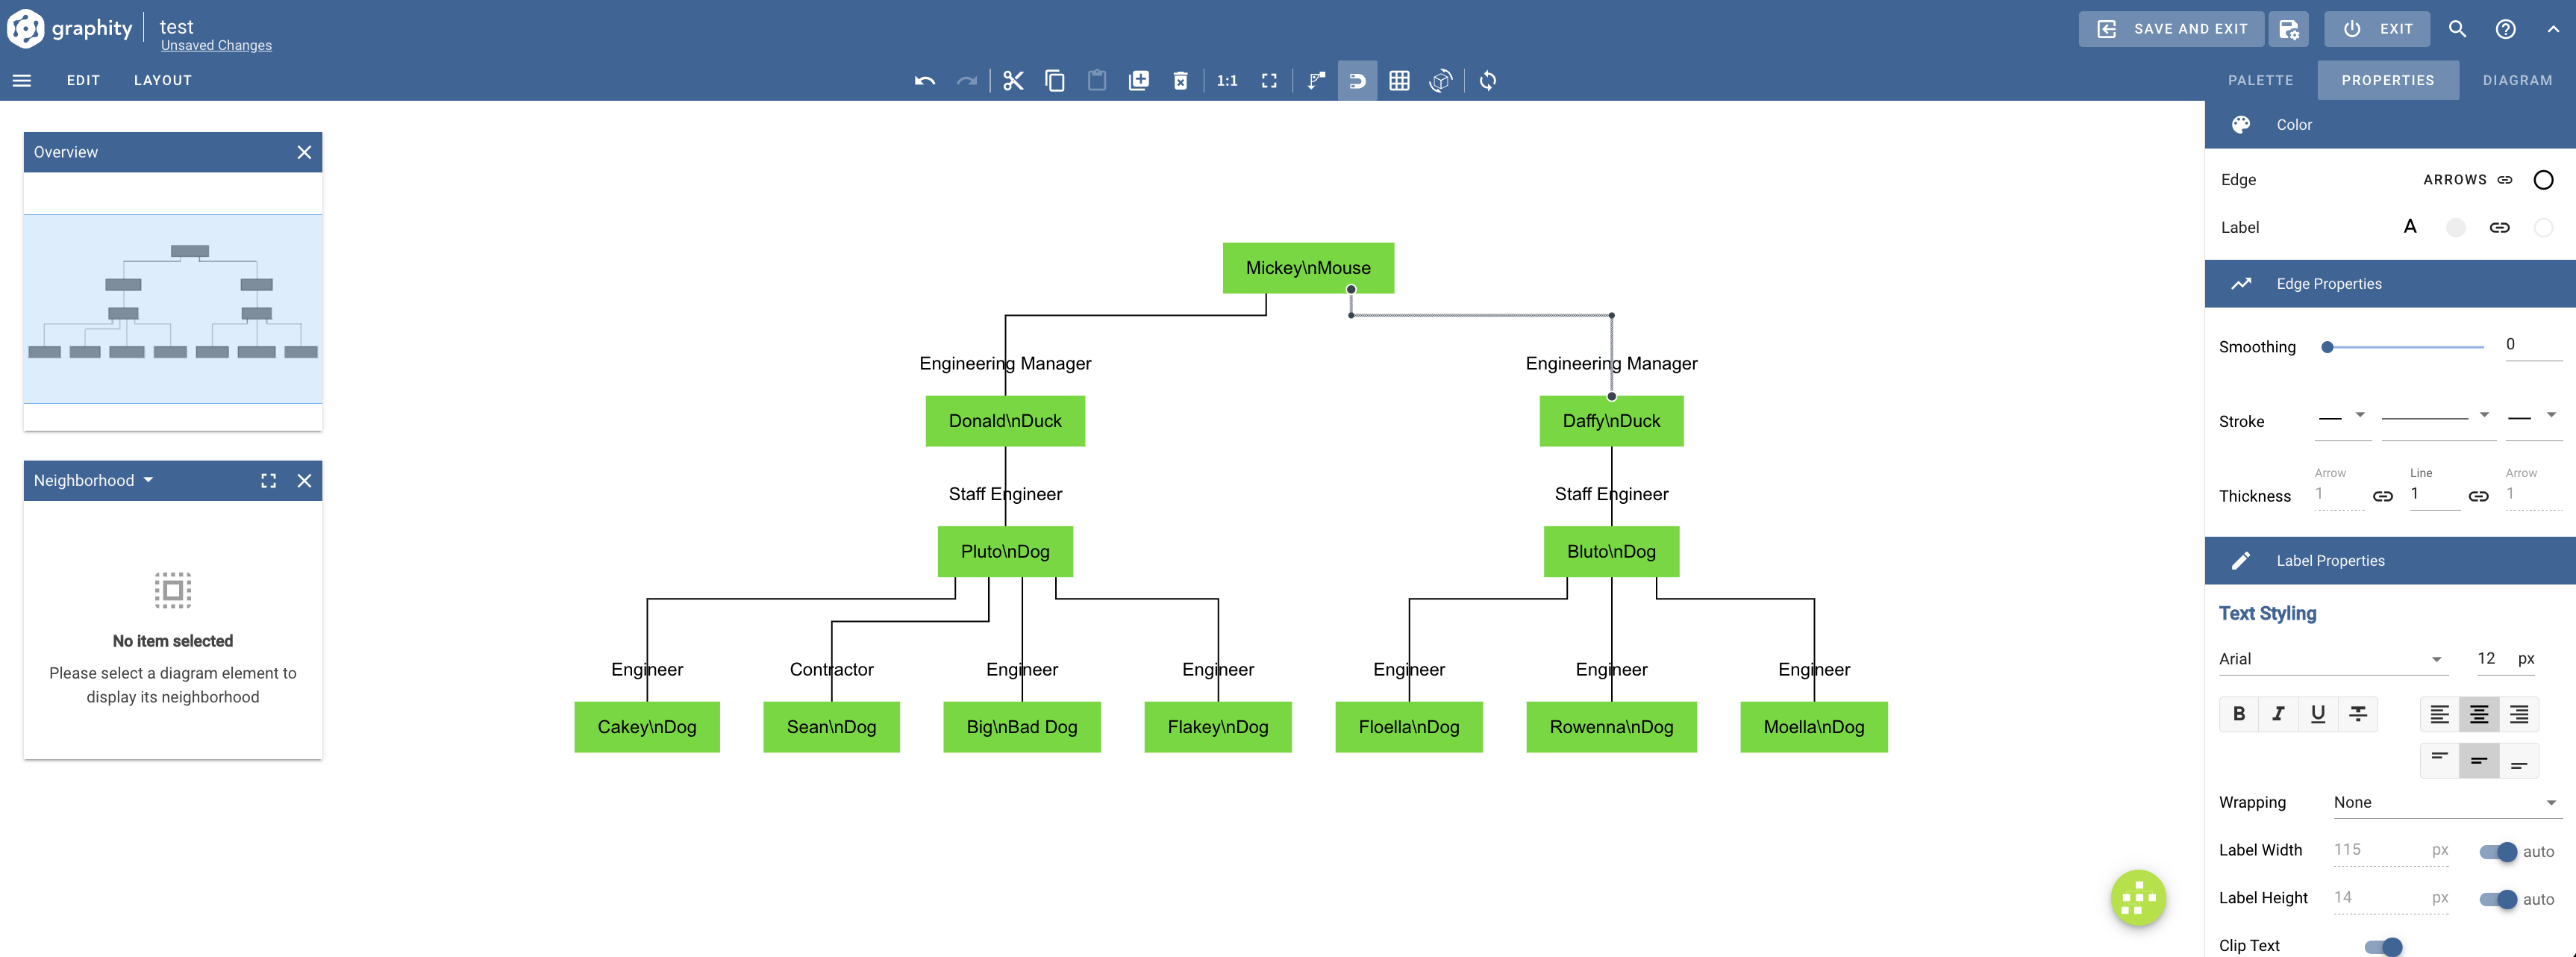

In [5]:
from IPython.display import Image as ImageDisplay, Markdown, display

def displayImage(im_file, width=1200):
    display(ImageDisplay(im_file, width=width))

displayImage('graphity.png')

The accompanying `organogram` Python module can also attempt to render an org chart using the Python `networkx` module.  This is a bit fiddly to get right in terms

### 3. Generating a visualisation using `graphviz`

The following example sets the `cstyle` to `angle` to give right angled edges.  Use `arc` if you want direct straight line edges between nodes instead.  You should set `scale` between 3 to 7 and `node_size` to a value between 5000 to 20000.  The `scale` value should be between 2 and 7 and reflects the image zoom.  For rendering in the browser, set `resetScale` `False`

Successfully generated organogram into file test.png of size 69.9kB


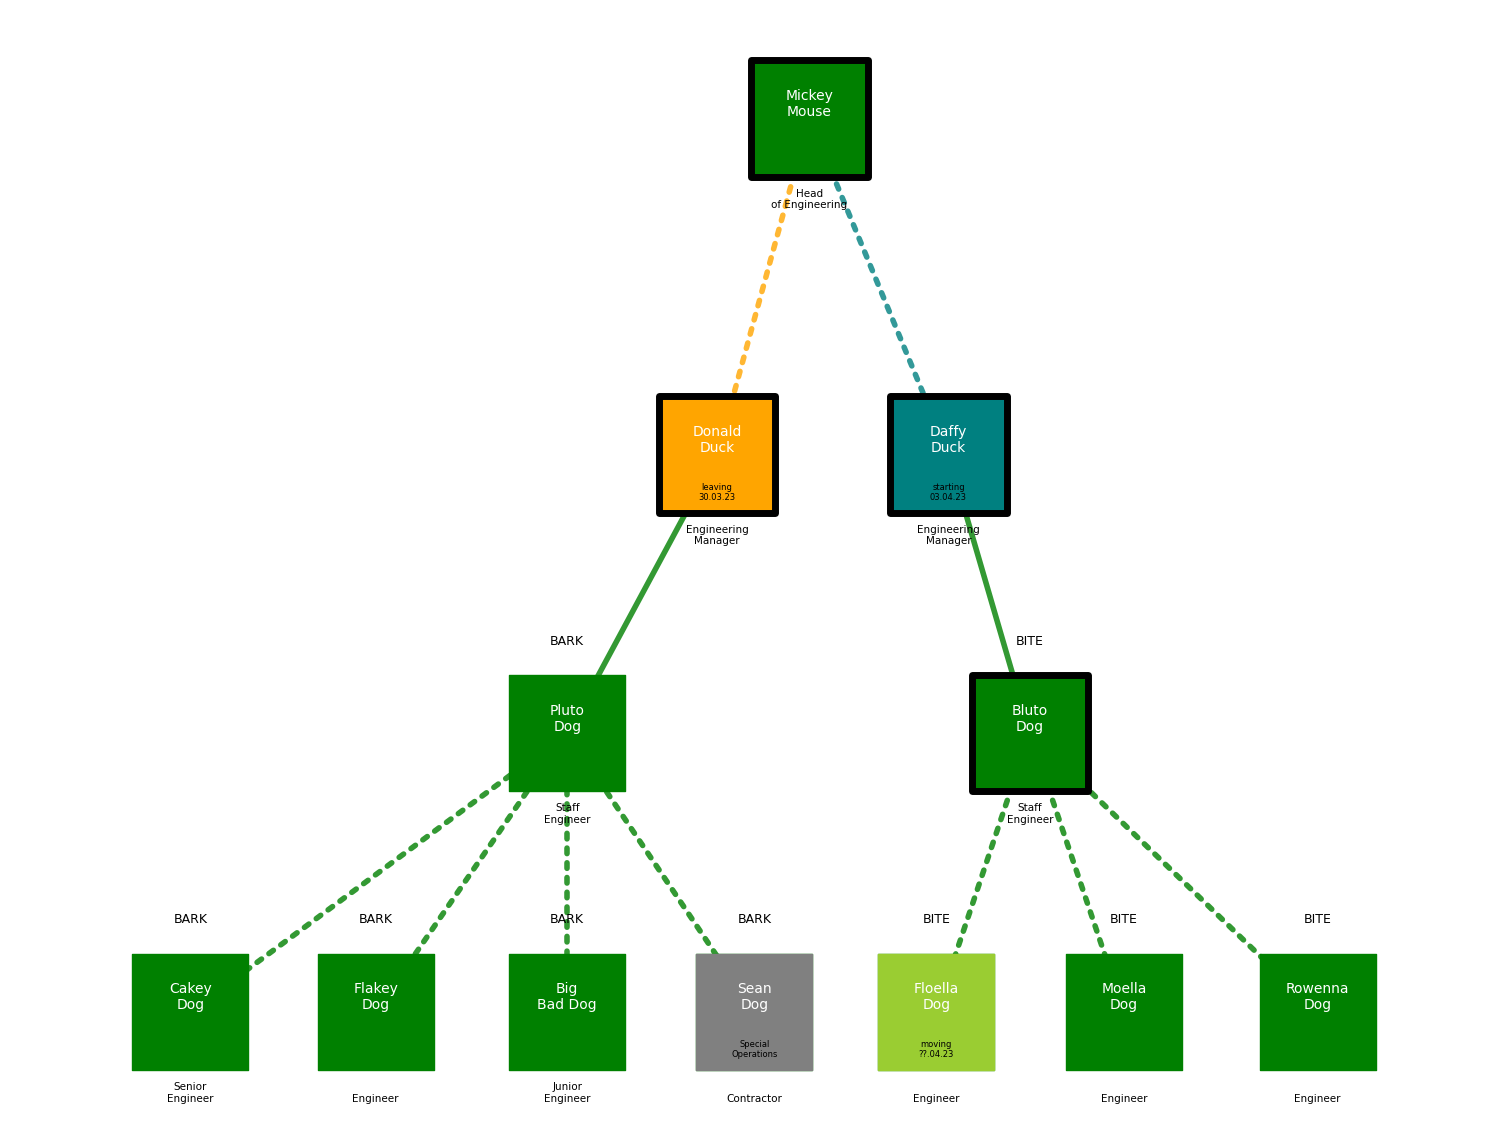

In [6]:
import os
from organogram import OrganisationDiagrammer

target = 'test.png'
g = org.create_graphviz_layout_from_graph(g, font_size=10, cstyle='arc', margin=0.1, offset=12, node_size=7000, scale=3, resetScale=False, image_file=target)
print(f'Successfully generated organogram into file {target} of size {round(os.path.getsize(target)/1024,1)}kB')

Successfully generated organogram into file test2.png of size 47.5kB


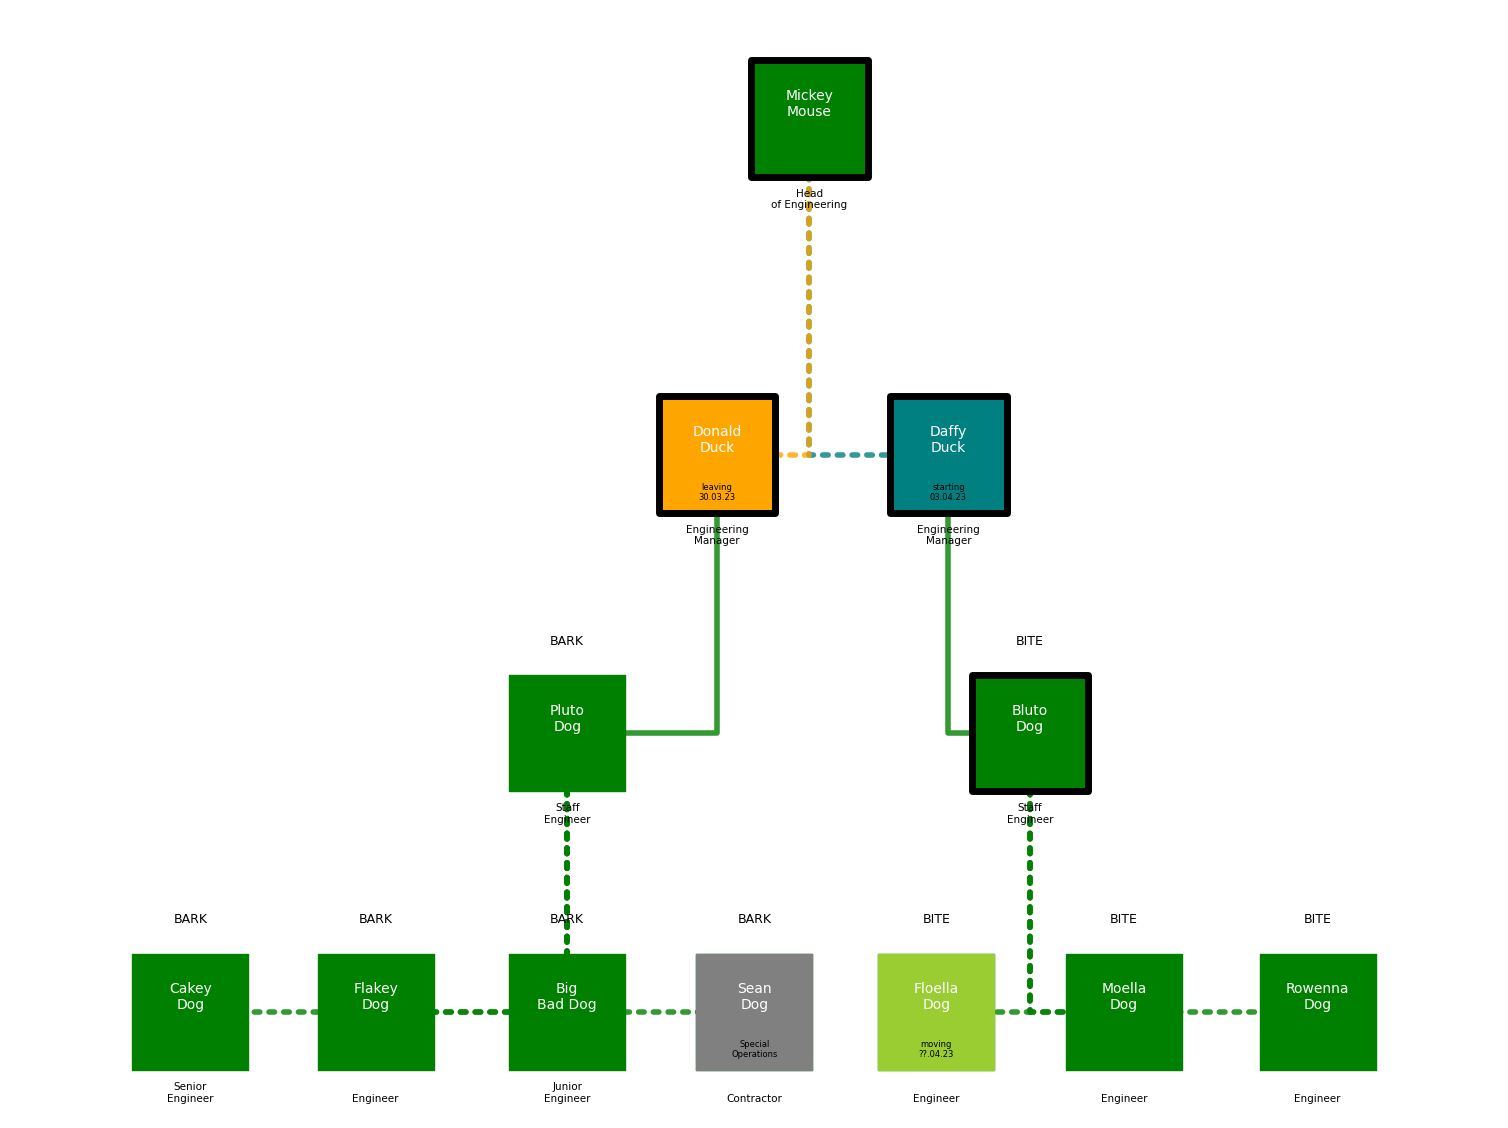

In [7]:
import os
from organogram import OrganisationDiagrammer

target = 'test2.png'
g = org.create_graphviz_layout_from_graph(g, font_size=10, cstyle='angle', margin=0.1, offset=12, node_size=7000, scale=3, resetScale=False, image_file=target)
print(f'Successfully generated organogram into file {target} of size {round(os.path.getsize(target)/1024,1)}kB')

### 4. Running the `pytest` test code

First we install `pytest`:
```
$ pip install pytest coverage pytest-cov
```

Then run the test code from this directory:
```
$ pytest --exitfirst --failed-first --cov=. --cov-report html -vv
============================== test session starts ============================== 
platform darwin -- Python 3.10.10, pytest-7.2.2, pluggy-1.0.0 -- /Users/Mal/.virtualenvs/checkatrade/bin/python
cachedir: .pytest_cache
rootdir: /Users/Mal/Desktop/CODE/orgcharts
plugins: anyio-3.6.2
collected 11 items                                                                                                                                                                                                         

tests/test_organogram.py::test_load_yaml_file PASSED                                                                                                                                                                 [  9%]
tests/test_organogram.py::test_create_graph_from_yaml PASSED                                                                                                                                                         [ 18%]
tests/test_organogram.py::test_create_valid_teams_and_status PASSED                                                                                                                                                  [ 27%]
tests/test_organogram.py::test_create_graph_from_yaml_validate PASSED                                                                                                                                                [ 36%]
tests/test_organogram.py::test_create_dotfile_from_graph PASSED                                                                                                                                                      [ 45%]
tests/test_organogram.py::test_create_graphviz_layout_from_graph PASSED                                                                                                                                              [ 54%]
tests/test_organogram.py::test_load_yaml_file_none PASSED                                                                                                                                                            [ 63%]
tests/test_organogram.py::test_create_graph_from_yaml_none PASSED                                                                                                                                                    [ 72%]
tests/test_organogram.py::test_load_yaml_file_mini PASSED                                                                                                                                                            [ 81%]
tests/test_organogram.py::test_create_graph_from_yaml_mini PASSED                                                                                                                                                    [ 90%]
tests/test_organogram.py::test_create_graph_from_yaml_mini_validate PASSED                                                                                                                                           [100%]

--------- coverage: platform darwin, python 3.10.10-final-0 ----------
Coverage HTML written to dir htmlcov

==============================  11 passed in 1.41s ============================== 
```

### 5. All at once

Successfully generated organogram into file tycoon.png of size 12.7kB


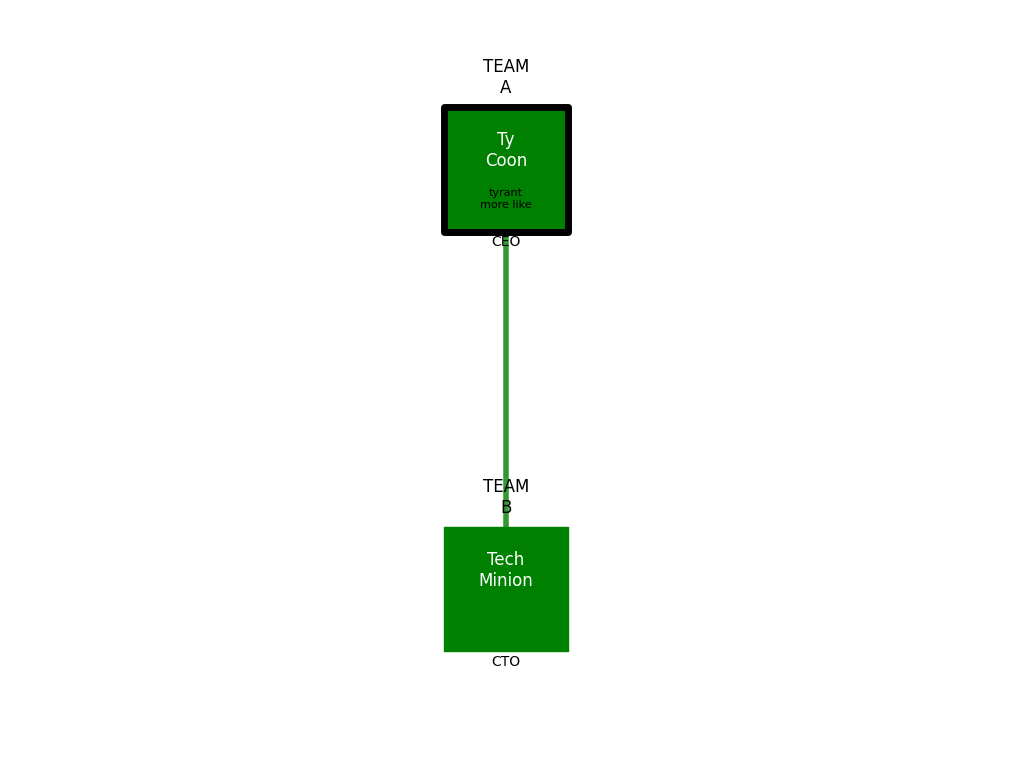

In [8]:
import os
from organogram import OrganisationDiagrammer

target = 'tycoon.png'
org = OrganisationDiagrammer()
g2 = org.create_graph_from_yaml(org.load_yaml_file('tycoon.yaml'),newline=True)
org.create_graphviz_layout_from_graph(g2, font_size=12, margin=0.3, cstyle='angle', offset=6, node_size=8000, scale=2, resetScale=False, image_file=target)
print(f'Successfully generated organogram into file {target} of size {round(os.path.getsize(target)/1024,1)}kB')